<h1><center>Red Blood Cell 3D-Model: Python Implementation</center></h1>

<center> <b>Viera, L.C.</b>; </center>


<!--  -->

In [ ]:
import sys
sys.versions

'3.6.9 (default, Jul 17 2020, 12:50:27) \n[GCC 8.4.0]'

# RBC profile section (Cassini Oval condition a<b)

\begin{align}
\rho = \alpha \sqrt{cos(2\theta)+\sqrt{\left(\frac{b}{a}\right)^4-sin^2(2\theta)}}
\end{align} 

In [ ]:
import numpy as np

phi = np.linspace(0,2*np.pi, 100)

def pol2cart(t, a=2, b=2.1):
    e = b/a
    rho = a*np.sqrt(np.cos(2*t)+np.sqrt(e**4-np.sin(2*t)**2)) #Parametric Equation.
    x = rho*np.cos(phi)
    y = rho*np.sin(phi)
    return(x, y)

x, y = pol2cart(phi)

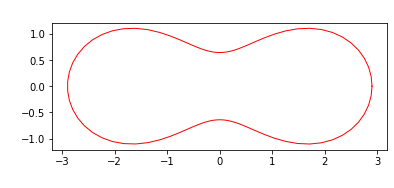

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)
plt.plot(x,y, color='r', linewidth = 1)
ax.set_aspect(1)

#plt.ylim(-3,3) 
#plt.xlim(-3,3) 

plt.xlabel('x - axis', color='white')
plt.ylabel('y - axis', color='white') 

plt.title('Cassini Oval (a=2, b=2.1)', color='white') 
plt.savefig("plot_cassini_oval.png", bbox_inches='tight')

plt.show()

# RBC 3D Surface

Consider the following Evans, E.A., and R. Skalak RBC model, [1, 1980].

\begin{align}
z = \pm D_0 \sqrt{1 - \frac{4(x^2+y^2)}{D_{0}^2}} \left( a_0 + \frac{a_1(x^2+y^2)}{D_{0}^2}+\frac{a_2(x^2+y^2)^2}{D_{0}^4}\right),
\end{align}


## Setting Parameters

In [ ]:
import numpy as np

D0 = 7.82 #Cell Diameter in micrometers.
a0, a1, a2 = 0.00518, 2.0026, -4.491 #a0 varies the cell thickness. 
noR = 15 #Set of points.
rMax = D0/2
r = np.linspace(0, rMax, noR) 
fact = 0.8
last = r[-1] 
lastb1 = r[-1-1] 
radd = (1-fact) * lastb1 + fact * last 
allblast = r[0:-1] 
r = np.append(allblast, [radd, last]) 
dr = r[1] - r[0] 

## Polar Coordinates 

In [ ]:
Rs = []
Phi = []

for k in range(1,noR):
  L = 2 * np.pi*r[k]
  noPhi = round(L /dr)
  phi = np.linspace(0, int(2 *np.pi * (noPhi-1)/noPhi), int(noPhi))
  Rs = np.append(Rs, r[k]*np.ones((int(noPhi), 1)))
  Phi = np.append(Phi, phi)

## Cartesian Coordinates

In [ ]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

[x, y] = pol2cart(Rs, Phi)

## Parametric Equation for Z coordinate

In [ ]:
t = x**2 + y**2
z = D0 * np.sqrt(1-4*t/D0**2) * (a0 + (a1 * t) / D0**2 + (a2 * t**2) / D0**4)

## Computation for the points at the maximum radius


In [ ]:
L = 2 * np.pi * rMax
noPhi = round( L / dr )
phi = np.linspace(0, int(2 * np.pi * (noPhi - 1)/ noPhi), int(noPhi))
phi = phi.transpose()
ones = rMax*np.ones((int(noPhi), 1))
(xm, ym) = pol2cart(ones, phi)
zm = np.zeros((int(noPhi), 1))

## Concatenate


In [ ]:
x = np.append(x, xm[0])
y = np.append(y, ym[0])
z = np.append(z, zm)

x.shape, y.shape, z.shape

((747,), (747,), (747,))

## Performing Delaunay Tessellation Field Estimator
Creates a 2-D Delaunay triangulation from points in vectors x and y.

In [ ]:
import matplotlib.tri as mtri

tri = mtri.Triangulation(x,y) #Creating a Triangulation without specifying the 
                              #triangles results in Delaunay triangulation.

#Invalid data are masked out:
ntri = tri.triangles.shape[0]
init_mask_frac = 10
mask_init = np.zeros(ntri, dtype=bool)
masked_tri = np.random.randint(0, ntri, int(ntri * init_mask_frac))
mask_init[masked_tri] = True
tri.set_mask(mask_init)

# Plot Figure

In [ ]:
#%matplotlib notebook 
#Inside jupyter notebook.

%matplotlib inline 
#Inside google colab.

## Colormap

In [ ]:
import matplotlib as mpl
cmap = mpl.cm.autumn
cmap_reversed = mpl.cm.get_cmap('autumn_r')

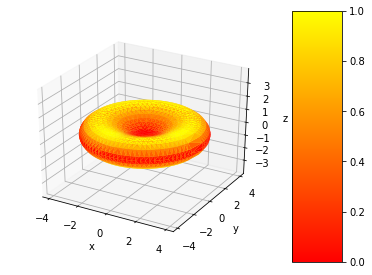

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection="3d")

ax.plot_trisurf(x, y, z, cmap=mpl.cm.autumn, linewidth=1, antialiased=True)
ax.plot_trisurf(x, y, -z, cmap=cmap_reversed, linewidth=1, antialiased=True)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

surf = ax.plot_trisurf(tri, y, z, cmap=mpl.cm.autumn, linewidth=0, antialiased=True, vmin=0, vmax=1)
fig.colorbar(surf, shrink=5, aspect=5)

plt.show()

## Projection

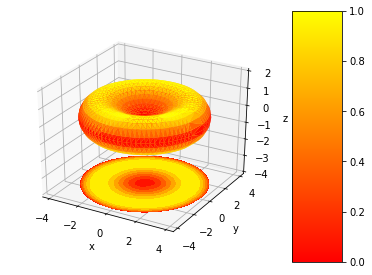

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection="3d")

ax.plot_trisurf(x, y, z, cmap=mpl.cm.autumn, linewidth=1, antialiased=True)
ax.plot_trisurf(x, y, -z, cmap=cmap_reversed, linewidth=1, antialiased=True)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

surf = ax.plot_trisurf(tri, y, z, cmap=mpl.cm.autumn, linewidth=0, antialiased=True, vmin=0, vmax=1)
fig.colorbar(surf, shrink=5, aspect=5)

ax.tricontourf(x, y, z, zdir='z', offset=-4, cmap=mpl.cm.autumn)

ax.set_zlim(-4, 2)
#ax.view_init(90, 90)
plt.show()

# References

[1] Evans, E.A., and R. Skalak. 1980. Mechanics and Thermodynamics of Biomembranes. CRCPress, BocaRaton, FL.

[2] Paul O'Leary, 2014, "Shape of an unstressed RBC according to Evans and Skalak".